In [17]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from src.data_loader import read_data

train_data = read_data('train')
val_data = read_data('val')
test_data = read_data('test')

100%|██████████| 200/200 [00:00<00:00, 6614.32it/s]


In [19]:
import clip.clip as clip 

CLIP_MODEL,  clip_img_processor =clip.load('ViT-B/32', jit=False)

In [20]:
from src.config import BATCH_SIZE
import random 
import numpy as np 
import torch 

from src.networks.CLIP_distilBERT import CLIP_dBERT_dataset

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
g = torch.Generator()
g.manual_seed(0)

def get_dataloader(data):
    dataset = CLIP_dBERT_dataset(data, clip_img_processor)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,shuffle=True, worker_init_fn=seed_worker, generator=g)
    return data_loader
    
train_loader = get_dataloader(train_data)
val_loader = get_dataloader(val_data)
test_loader = get_dataloader(test_data)

CLIP preprocessing: 100%|██████████| 200/200 [00:02<00:00, 72.84it/s]


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2/2 [00:01<00:00,  1.23it/s]




For epoch = 0
Training Loss = 0.6211074915799227 | Training Accuracy = 0.004450757575757576
Validation Loss = 0.5433325469493866|Validation Accuracy = 0.0




100%|██████████| 2/2 [00:01<00:00,  1.22it/s]




For epoch = 1
Training Loss = 0.4186060523444956 | Training Accuracy = 0.10833333333333334
Validation Loss = 0.454342782497406|Validation Accuracy = 0.09425403225806452




100%|██████████| 2/2 [00:01<00:00,  1.18it/s]




For epoch = 2
Training Loss = 0.30825101787393744 | Training Accuracy = 0.14791666666666667
Validation Loss = 0.4036793112754822|Validation Accuracy = 0.11139112903225806




100%|██████████| 2/2 [00:01<00:00,  1.14it/s]




For epoch = 3
Training Loss = 0.27022089673714206 | Training Accuracy = 0.17367424242424243
Validation Loss = 0.37596753239631653|Validation Accuracy = 0.11139112903225806




100%|██████████| 2/2 [00:01<00:00,  1.12it/s]




For epoch = 4
Training Loss = 0.27044096182693134 | Training Accuracy = 0.1428030303030303
Validation Loss = 0.35094451904296875|Validation Accuracy = 0.11139112903225806




100%|██████████| 2/2 [00:01<00:00,  1.11it/s]




For epoch = 5
Training Loss = 0.2869829718362201 | Training Accuracy = 0.165719696969697
Validation Loss = 0.3171960264444351|Validation Accuracy = 0.12701612903225806




100%|██████████| 2/2 [00:01<00:00,  1.11it/s]




For epoch = 6
Training Loss = 0.2978124205361713 | Training Accuracy = 0.2024621212121212
Validation Loss = 0.2911421060562134|Validation Accuracy = 0.12651209677419356




100%|██████████| 2/2 [00:01<00:00,  1.08it/s]




For epoch = 7
Training Loss = 0.31449146365577524 | Training Accuracy = 0.19214015151515154
Validation Loss = 0.27985720336437225|Validation Accuracy = 0.1592741935483871




100%|██████████| 2/2 [00:01<00:00,  1.08it/s]




For epoch = 8
Training Loss = 0.3227729838002812 | Training Accuracy = 0.19479166666666667
Validation Loss = 0.27908702194690704|Validation Accuracy = 0.14314516129032256




100%|██████████| 2/2 [00:01<00:00,  1.09it/s]



For epoch = 9
Training Loss = 0.32170628214424307 | Training Accuracy = 0.22395833333333331
Validation Loss = 0.2810579091310501|Validation Accuracy = 0.14314516129032256




ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

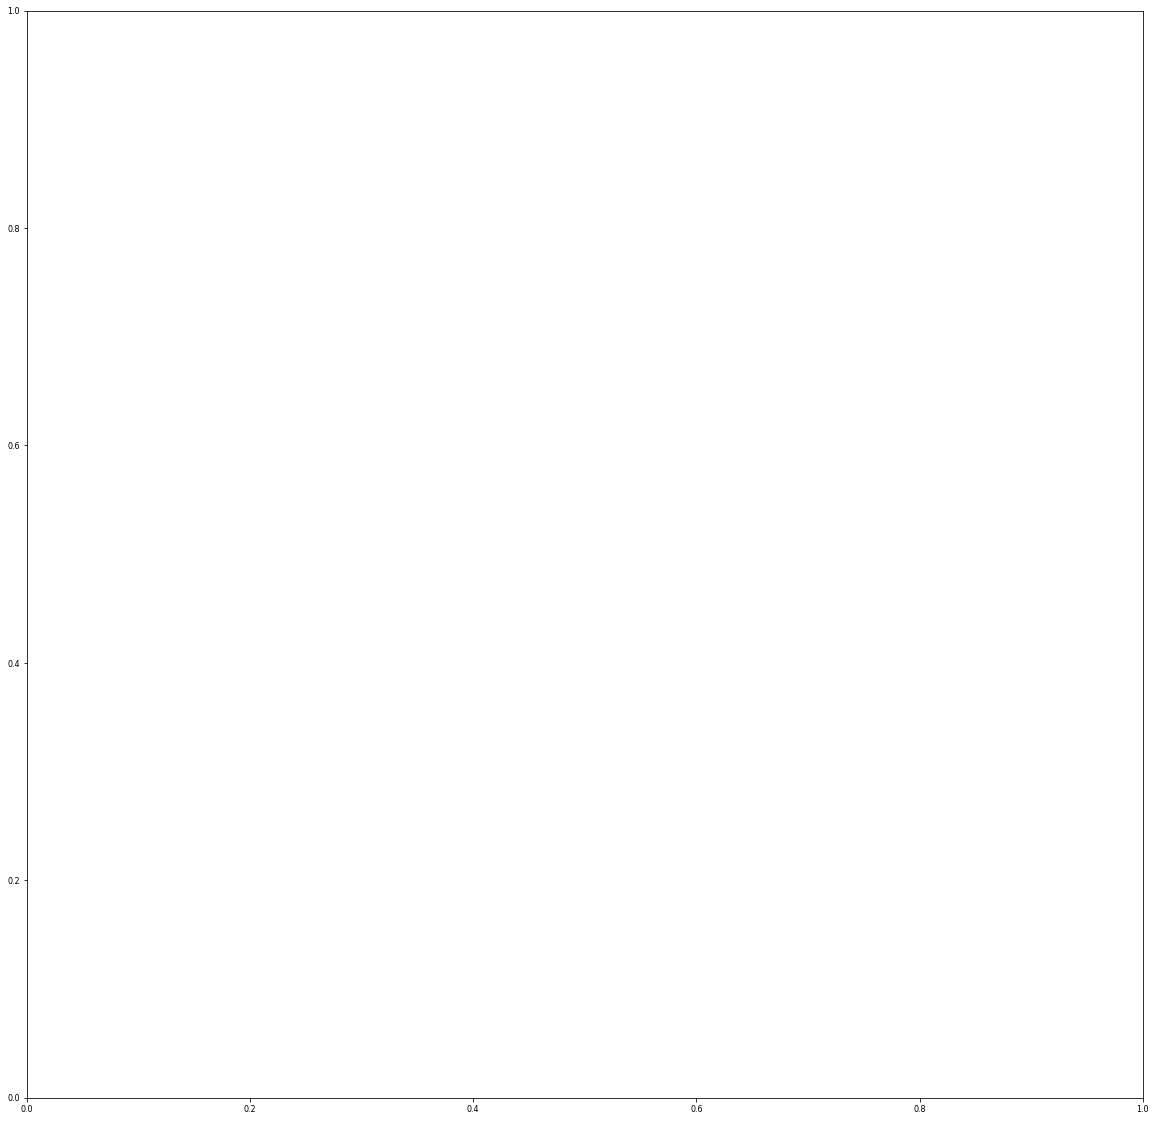

In [21]:
from src.trainer import Trainer
from src.networks.CLIP_distilBERT import CLIP_dBERT_Input_transformer, CLIP_dBERT_Model
import torch.nn as nn
import torch 

trainer = Trainer(10)

#Set data
trainer.set_data(train_loader, val_loader)

#set model 
model = CLIP_dBERT_Model(CLIP_MODEL).cuda()
input_transformer = CLIP_dBERT_Input_transformer()
trainer.set_model(model, input_transformer)

#Backpropagation
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
trainer.set_optimizer(optimizer, loss_fn)
trainer.train(l2_r=1e-3)
trainer.plot()

In [22]:
trainer.test(test_loader)

100%|██████████| 22/22 [00:18<00:00,  1.17it/s]

Accuracy Score = 26.055312954876275
Macro F1 score Score = 10.884702843900214
Micro F1 score Score = 61.68291802094619
